## **Sales Data Analysis**

### Resume

The online store has experienced fluctuations in sales throughout 2023. Although overall revenue appears to remain stable, management has expressed several key concerns related to business performance. In particular, they want to better understand:

📉 Are some product categories underperforming despite high traffic?

👥 Which age groups and genders are the most frequent buyers?

📆 What months drive the most sales, and are there seasonal trends?

💸 Are there pricing or profitability differences across product types?

📦 Which products should be prioritized in marketing and inventory planning?

This analysis was conducted to answer these business questions through a comprehensive exploration of the sales data. The dataset includes transaction records with variables such as date, product category, quantity, price, customer age, and gender.

The goal is to deliver actionable insights that support strategic decisions in marketing, pricing, and product development.

### Dataset

#### Sales Dataset

Variables

-Date: The date the transaction occurred.

-Gender: The gender of the customer (e.g., Male or Female).

-Age: The age of the customer.

-Product Category: The category of the product purchased (e.g., Beauty, Clothing, Electronics).

-Quantity: The number of units purchased.

-Price per Unit: Price of a single unit of the product.

-Total Amount: Total amount spent for that transaction (Quantity × Price per Unit).

### Installing Required Libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [316]:
df=pd.read_csv('../dataset/raw/Sales Dataset.csv')
df.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


Let's check the column names, the data type of each variable, and the size of the rows and columns.

In [317]:
df.columns

Index(['Unnamed: 0', 'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [318]:
df.dtypes

Unnamed: 0           int64
Date                object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [319]:
df.shape

(1000, 8)

#### Cleaning Data

In [320]:
#drop column Unnamed: 0, because it is not useful 
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [321]:
#Tranform the colummn Date to datetime
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [322]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 148.0 KB


Here we can see that the dataframe uses 148.0 kb of memory

Here we can see that there is no missing data in the data frame.

### Optimizing data

Convert columns to smaller types

In [323]:
df['Age']=df['Age'].astype('int8')
df['Quantity']=df['Quantity'].astype('int8')
df['Price per Unit']=df['Price per Unit'].astype('float32')
df['Total Amount']=df['Total Amount'].astype('float32')

Getting dummy variables

In [324]:
dummy_variables=pd.get_dummies(df['Gender'])
df=pd.concat([df,dummy_variables], axis=1)
df.drop(columns=['Gender'], inplace=True)

Change index

In [325]:
#df.set_index('Date', inplace=True)
df.set_index('Date', inplace=True)
df 

,Age,Product Category,Quantity,Price per Unit,Total Amount,Female,Male
Date,,,,,,,
2023-11-24,34,Beauty,3,50.0,150.0,False,True
2023-02-27,26,Clothing,2,500.0,1000.0,True,False
2023-01-13,50,Electronics,1,30.0,30.0,False,True
2023-05-21,37,Clothing,1,500.0,500.0,False,True
2023-05-06,30,Beauty,2,50.0,100.0,False,True
...,...,...,...,...,...,...,...
2023-05-16,62,Clothing,1,50.0,50.0,False,True
2023-11-17,52,Beauty,3,30.0,90.0,False,True
2023-10-29,23,Beauty,4,25.0,100.0,True,False


In [326]:
df.info(memory_usage='deep')
#saving data
df.to_csv("../dataset/processed/Sales Data(Cleaned).csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int8   
 1   Product Category  1000 non-null   object 
 2   Quantity          1000 non-null   int8   
 3   Price per Unit    1000 non-null   float32
 4   Total Amount      1000 non-null   float32
 5   Female            1000 non-null   bool   
 6   Male              1000 non-null   bool   
dtypes: bool(2), float32(2), int8(2), object(1)
memory usage: 75.6 KB


If we check the memory used again, we can see that it was reduced to 75.6 kb, which is a 49% reduction in memory.

### Display of data

The best way to do this analysis is to focus on one year.

In [327]:
#I going to use this dataframe for all notebook
df_2023=df[df.index.year==2023].copy()

In [328]:
#I'm going to create a list with the amount of values ​​of n
def get_colors(n):
    return sns.color_palette("muted",n_colors=n)
#Some global settings that all graphics on the notebook will have
def setting_styles(ax, title, labels_leyend=None):
    ax.set_title(title, fontsize=12,fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if labels_leyend:
        ax.legend(loc='upper left', fontsize=10, frameon=False, labels=labels_leyend)
    else:
        ax.legend(loc='upper left', fontsize=10, frameon=False)

#### Total of sales and profits by product category 

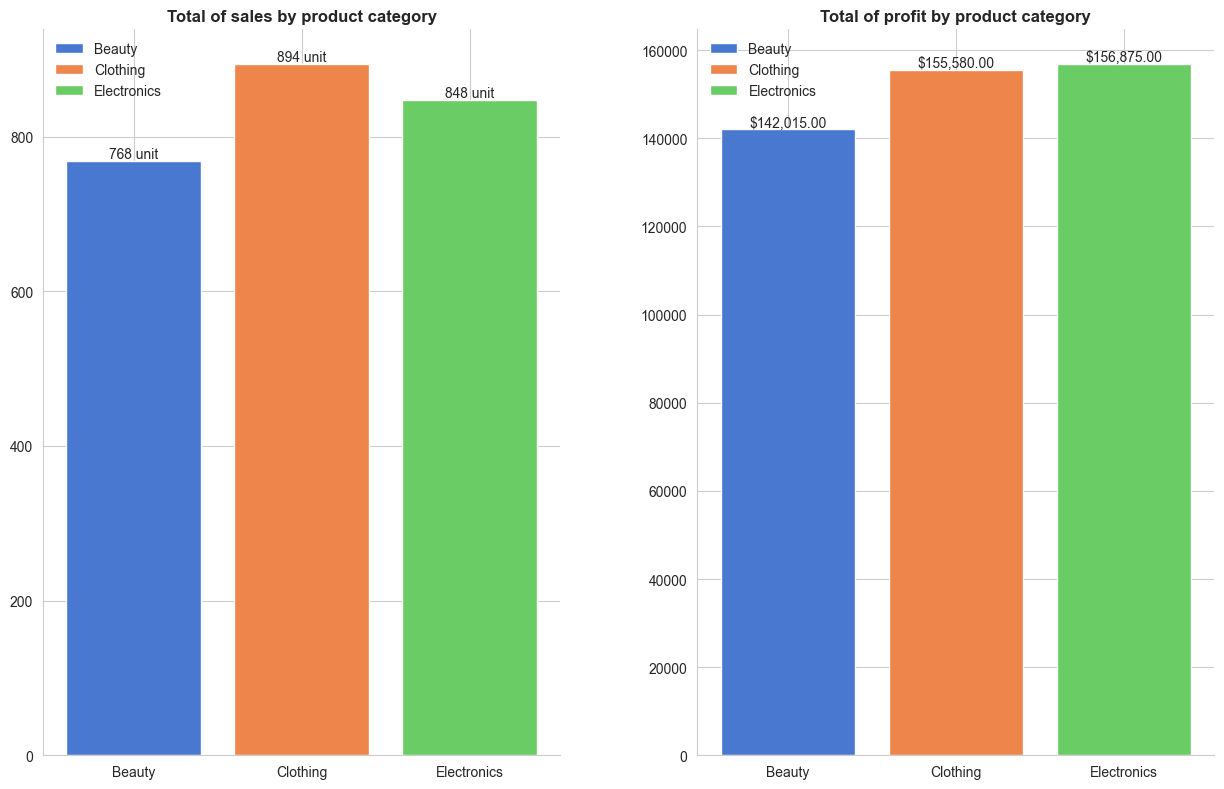

In [ ]:
# Group the 2023 sales data by product category and sum up Quantity and Total Amount
df_sales=df_2023[["Product Category", 'Quantity','Total Amount']].groupby("Product Category").sum().reset_index()
colors = get_colors(len(df_sales['Product Category'].unique()))
fig, ax =plt.subplots(1, 2,figsize=(13, 8))# 1 row, 2 columns of plots
# Generate a list of colors based on the number of unique product categories
colors = get_colors(len(df_sales['Product Category'].unique()))
# Define the data and titles for each subplot: one for quantity, one for revenue
list_data=[
    {
        'y':'Quantity',
        'title':'Total of sales by product category',
    },
        {
        'y':'Total Amount',
        'title':'Total of profit by product category',
    }
]
for index, values in enumerate(list_data):
    # Draw bar chart for either Quantity or Total Amount
    bar = ax[index].bar(
        df_sales['Product Category'],             # X-axis: product categories
        df_sales[values['y']],                    # Y-axis: values (quantity or amount)
        color=colors,                             # Bar colors
        label=df_sales['Product Category']        # Labels (optional here)
    )

    # Apply consistent title and style using custom function
    setting_styles(ax[index], values['title'])
    #style for bar value name
    if values['y'] == 'Total Amount':
        # Format revenue values with dollar sign and commas
        labels = [f"${v:,.2f}" for v in df_sales['Total Amount']]
    else:
        # Format quantity values with "unit" suffix
        labels = [f"{v} unit" for v in df_sales['Quantity']]
    
    # Display value labels on top of each bar
    ax[index].bar_label(bar, labels=labels)

# Add horizontal space between subplots (adjust as needed)
plt.subplots_adjust(wspace=15)

# Automatically adjust padding and layout to avoid overlaps
plt.tight_layout()

# Display the final plot
plt.show()


The Apparel category clearly leads in sales volume with 894 units sold, reflecting high demand. On the other hand, although it sold fewer units, the Electronics category generated the most revenue, reaching a total of $156,875, suggesting a higher value per transaction.

This difference reveals an important strategic pattern: Apparel is key to sustaining sales flow, while Electronics drives profitability. Therefore, while the former can be leveraged to attract and retain customers, the latter represents an opportunity to maximize profit margins.

***These findings can guide strategic decisions related to pricing, targeted marketing campaigns, and inventory optimization, aligning business management with both the sales volume and financial impact of each category***

#### Trading of Sales in a 2023 

Beauty
Clothing
Electronics


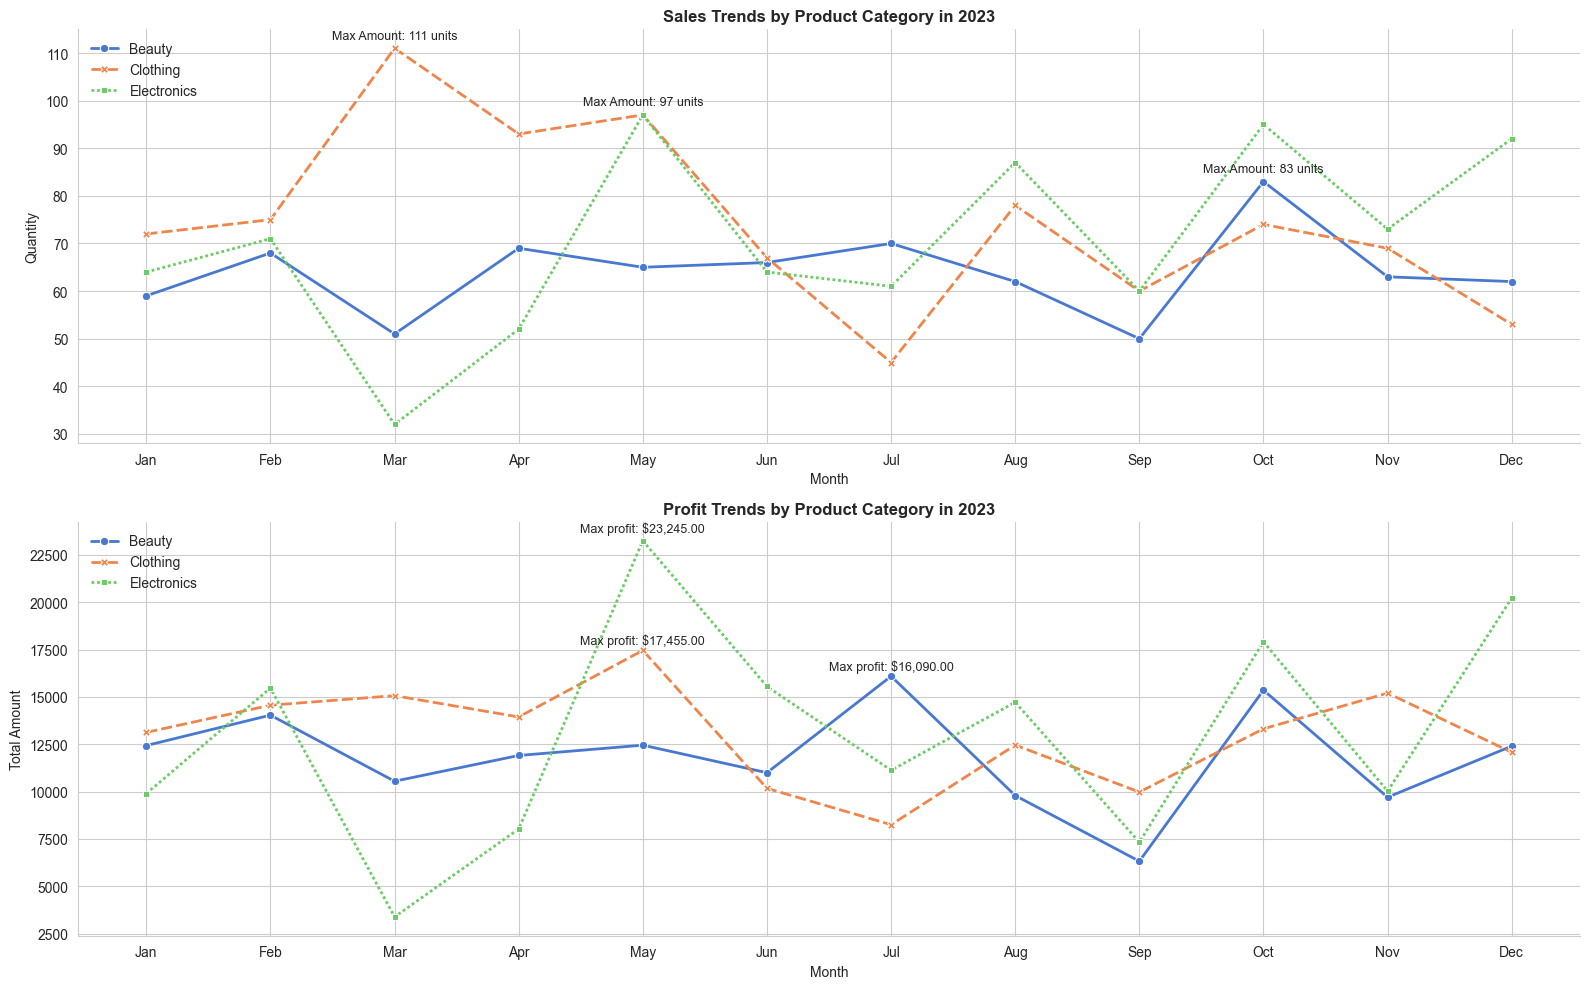

In [ ]:
def greatest_values(df, ax , column):
    df_group = df.groupby('Product Category')  # Group data by product category
    for product, df_sub in df_group:  # Iterate through each product group
        idx_max = df_sub[column].idxmax()      # Get index of max value in the column
        row = df_sub.loc[idx_max]              # Get the row with the max value

        x = row['Month']                       # Month when max occurred
        y = row[column]                        # Max value

        # Customize label depending on whether it's quantity or revenue
        if column == 'Total Amount':
            label = f"Max profit: ${y:,.2f}"
            offset = y * 0.02  # Small offset to position label above the point
        else:
            label = f"Max Amount: {y} units"
            offset = 2

        # Add the annotation to the plot
        ax.text(x, y + offset, label, ha='center', fontsize=9)
#Collecting the months
df_2023_copy = df_2023.copy()  # Make a copy to avoid modifying the original DataFrame
# Extract month from datetime index
df_2023_copy['Month'] = df_2023_copy.index.month
df_2023_copy.reset_index(inplace=True)        # Reset index to make 'Date' a column again
df_2023_copy.drop(columns='Date', inplace=True)  # Drop 'Date' since we're using 'Month'


# Group by month and product category and sum sales and revenue
df_2023_copy=df_2023_copy[['Month','Product Category', 'Quantity', 'Total Amount']].groupby(['Month', 'Product Category']).sum().reset_index()
# Convert numeric month to abbreviated month name (e.g., 1 → Jan)
df_2023_copy['Month']=pd.to_datetime(df_2023_copy['Month'], format='%m').dt.strftime('%b')
fig, ax = plt.subplots(2,1,figsize=(16,10)) # Create 2 subplots (stacked vertically)
# Define what to plot in each subplot
list_data=[
    {
    'y':'Quantity',
    'title':"Sales Trends by Product Category in 2023",
    },
    {
    'y':'Total Amount',
    'title':"Profit Trends by Product Category in 2023"
    }
]
for index, values in enumerate(list_data):
     # Create a line plot for either quantity or profit
    sns.lineplot(
        data=df_2023_copy, 
        x='Month', 
        y=values['y'], 
        hue='Product Category',       # Color by product category
        style='Product Category',     # Also vary line style by product
        markers=True,                 # Show markers on each data point
        palette=colors,               # Use predefined color palette
        linewidth=2, 
        ax=ax[index],                 # Plot on the correct subplot
        errorbar=None                 # Disable confidence intervals
    )
    # Highlight the month with the highest value for each category
    greatest_values(df_2023_copy, ax[index], values['y'])

    # Apply consistent styles (e.g., title, no top/right borders)
    setting_styles(ax[index], values['title'])
plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()          # Display the plot

Apparel saw its highest unit sales in March (111), while electronics peaked in May with strong performance in both units sold (97) and profit ($23,245).
Beauty saw its highest sales in October and its highest profit in July ($16,090).

These trends suggest seasonal demand patterns and highlight electronics as the most profitable category, especially in May, providing valuable insights for inventory and marketing decisions.

## Who gender did buy more?

We lost the Gender column when finding the categorical variables, but now we need that data in a single column. The most practical thing would be to use a copy of the original data frame to recreate the column.

In [331]:
df_2023['Gender']=df_2023['Female'].apply(lambda x:  'Female' if x else 'Male')
df_2023['Gender']

Date
2023-11-24      Male
2023-02-27    Female
2023-01-13      Male
2023-05-21      Male
2023-05-06      Male
               ...  
2023-05-16      Male
2023-11-17      Male
2023-10-29    Female
2023-12-05    Female
2023-04-12      Male
Name: Gender, Length: 998, dtype: object

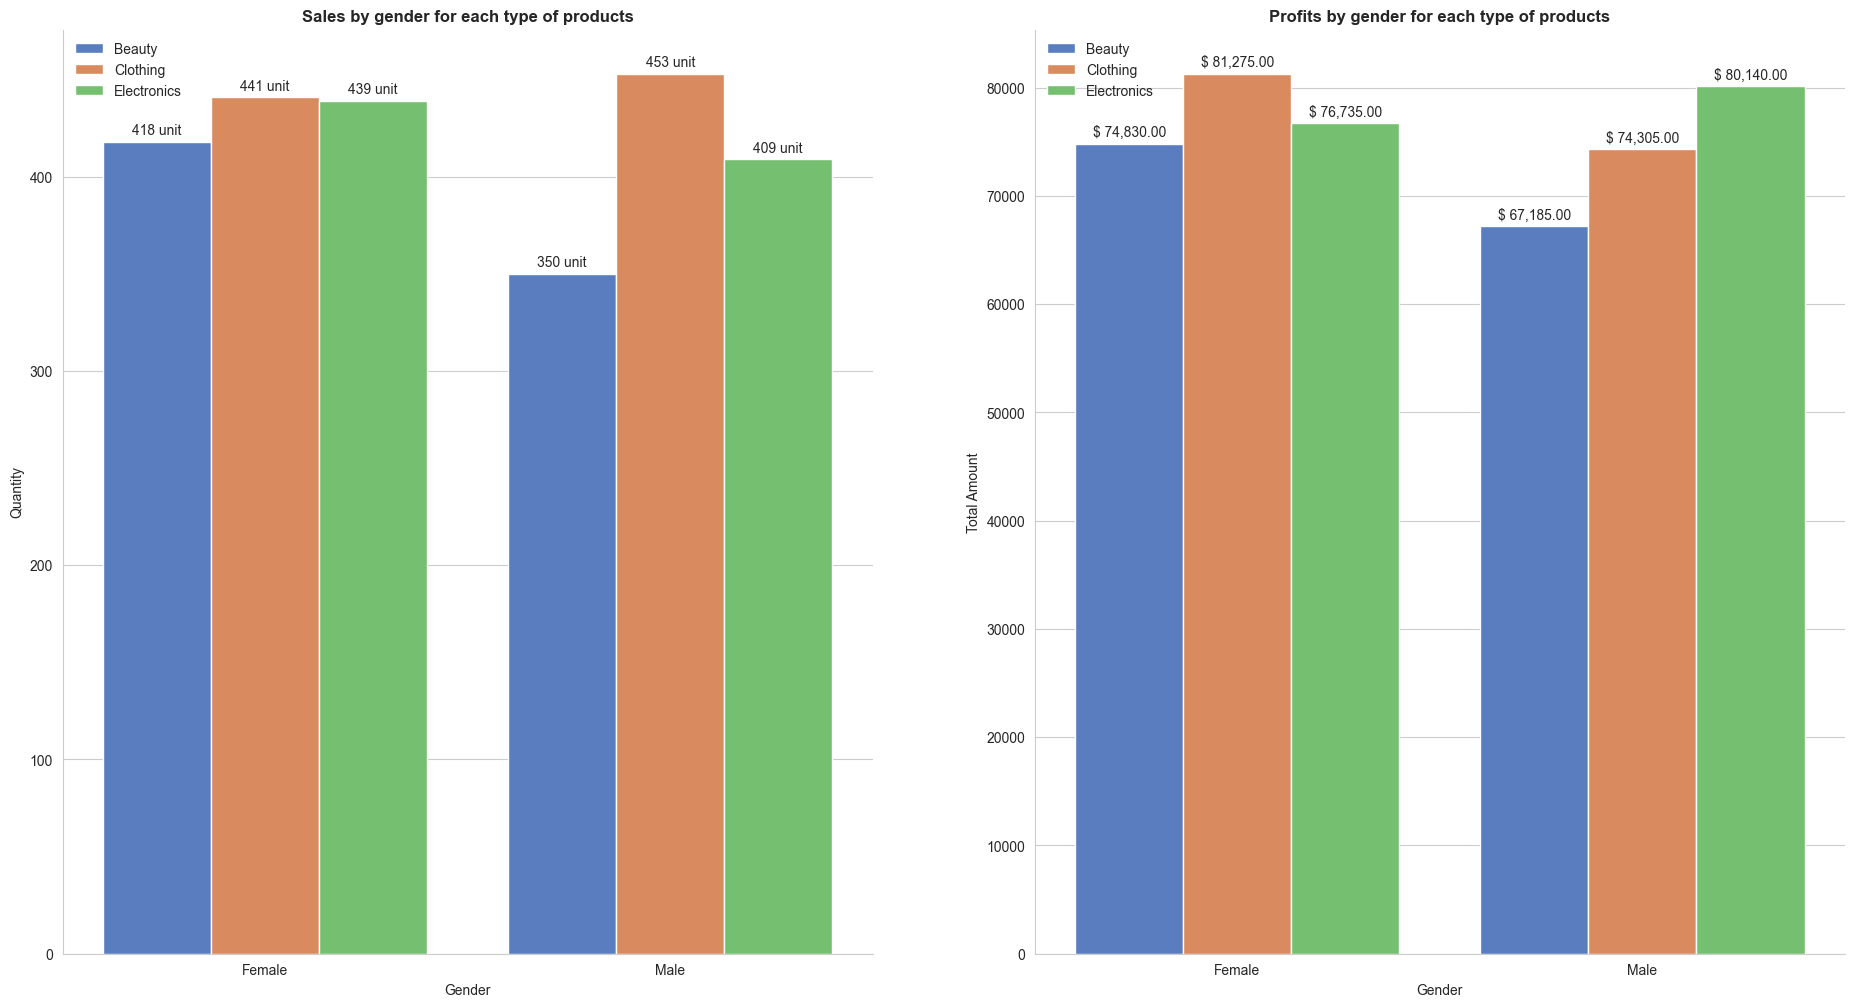

In [332]:
#Grouping the data for the graph
df_gp_copy=df_2023 [['Gender','Total Amount', 'Quantity', 'Product Category']].groupby(['Product Category', 'Gender']).sum().reset_index()
fig, ax=plt.subplots(1,2,figsize=(23,12))
colors=sns.color_palette('muted', n_colors=len(df_gp_copy['Product Category'].unique()))
list_data=[
    {
        'y':'Quantity',
        'title':'Sales by gender for each type of products'
    },
    {
        'y':'Total Amount',
        'title':'Profits by gender for each type of products'
    }
]
for index, barplot in enumerate(list_data):
    sns.barplot(x='Gender', y=barplot['y'], data=df_gp_copy, hue='Product Category', ax=ax[index], palette=colors)
    #setting styles
    
    if barplot['y']=='Quantity':
        label="%.0f unit"
    else:
        label="$ {:,.2f}"
    for bar in ax[index].containers:
        #bar containg the values
        ax[index].bar_label(bar,fmt=label, padding=3)
    setting_styles(ax[index], barplot['title'])
plt.show()



In the quantity barplot, we can see that clothing products are the most sold items for both genders. It is also noticeable that women purchase electronics almost as much as clothing, which is a valuable insight.

In the revenue chart, it's clear that women spend more on clothing than on any other category. For men, the highest spending is on electronics, coming close to the amount women spend on clothing.

In conclusion, women are our most valuable customer segment, generating a total of $232,840.00 in revenue, with 34.89% of that amount spent on clothing alone.

**Recommendation:**
It is advisable to expand the clothing selection for both women and men, given its high sales volume, and to enhance the electronics offerings targeted at men, as this category provides strong profit potential for the store.

## How old the best clients?

In [333]:
def display_countplot(x_values, data, hue, title, labels_leyend, xticks=None):
    fig, ax=plt.subplots(figsize=(10,6))
    sns.countplot(x=x_values, data=data, hue=hue, palette=get_colors(len(data[x_values].unique())))
    if xticks:
        ticks=ax.get_xticks()
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels=xticks)
        pos_leyened='upper left'
    else:
        pos_leyened='upper right'
    setting_styles(ax, title, labels_leyend)
    #replace the legend of the styles function
    ax.legend(loc=pos_leyened, frameon=False, labels=labels_leyend)
    for bar in ax.containers:
        ax.bar_label(bar)
    ax.set_ylabel("Amount of transactions")
    
    plt.tight_layout()
    #display graph
    plt.show()


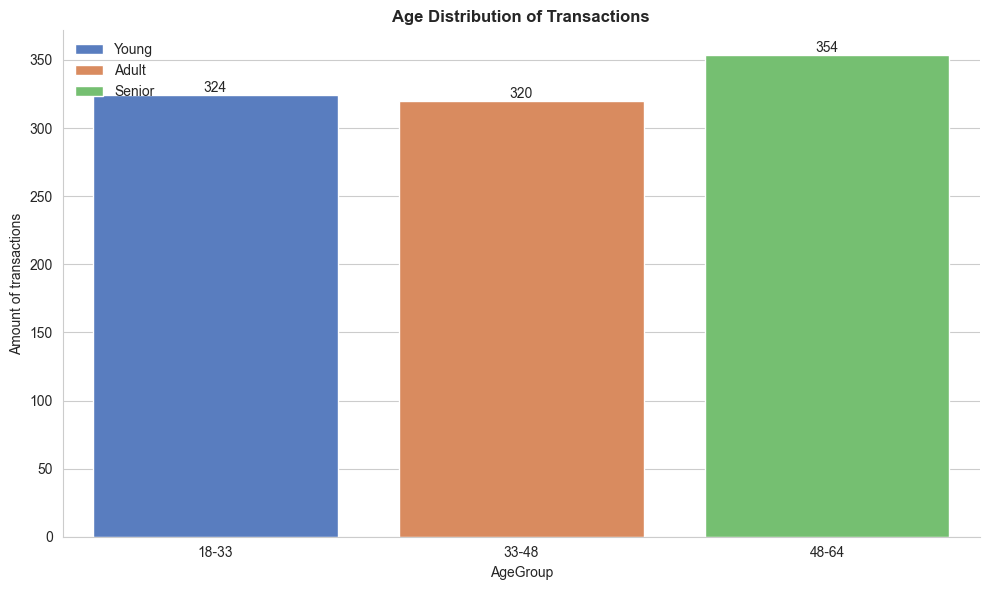

In [334]:
#making bins
bins=np.linspace(df_2023['Age'].min(), df_2023['Age'].max(), num=4)
#changing values float to int
bins=bins.astype(int)
#labels
names_ranges=['Young', 'Adult', 'Senior']
label = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
#Making new column AgeGroup
df_2023['AgeGroup']=pd.cut(df_2023['Age'], bins=bins, labels=names_ranges, include_lowest=True)
display_countplot('AgeGroup', df_2023, 'AgeGroup',"Age Distribution of Transactions", names_ranges, label)

It seems the best customers are between 48 and 64 years old, with a total of 354 transactions. Now that I know the best customers, I want to know what they buy the most and if there's much difference between the product categories they purchase.

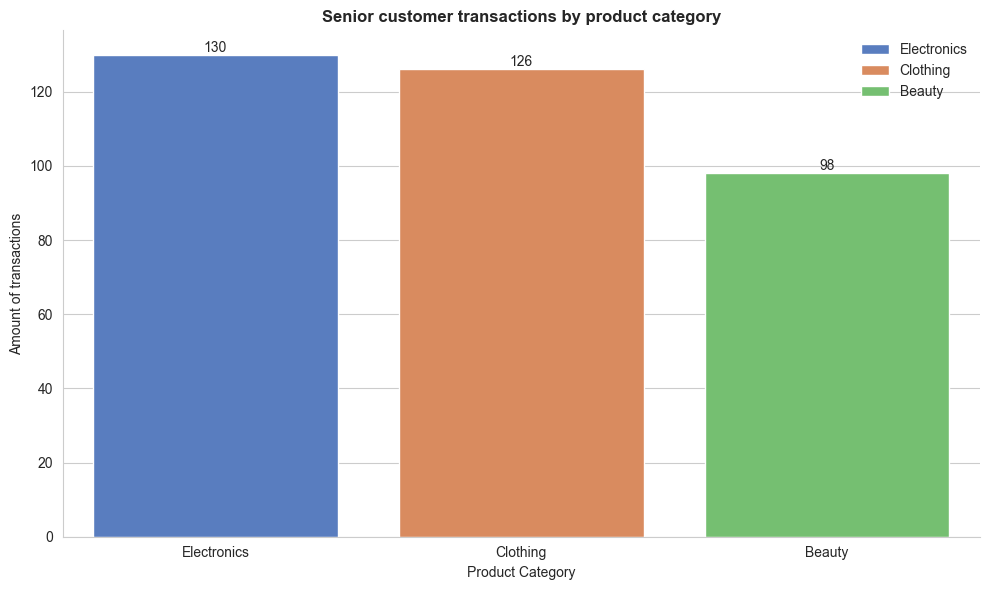

In [335]:
#dataframe with best clients
df_bc=df_2023[df_2023['AgeGroup']=='Senior']
display_countplot('Product Category', df_bc, 'Product Category','Senior customer transactions by product category', df_bc['Product Category'].unique().tolist())




Customers aged 48 to 64 are the most active in terms of transactions. Their purchases are primarily focused on the Electronics and Apparel categories, indicating strong interest and potential for customer loyalty in these product segments.


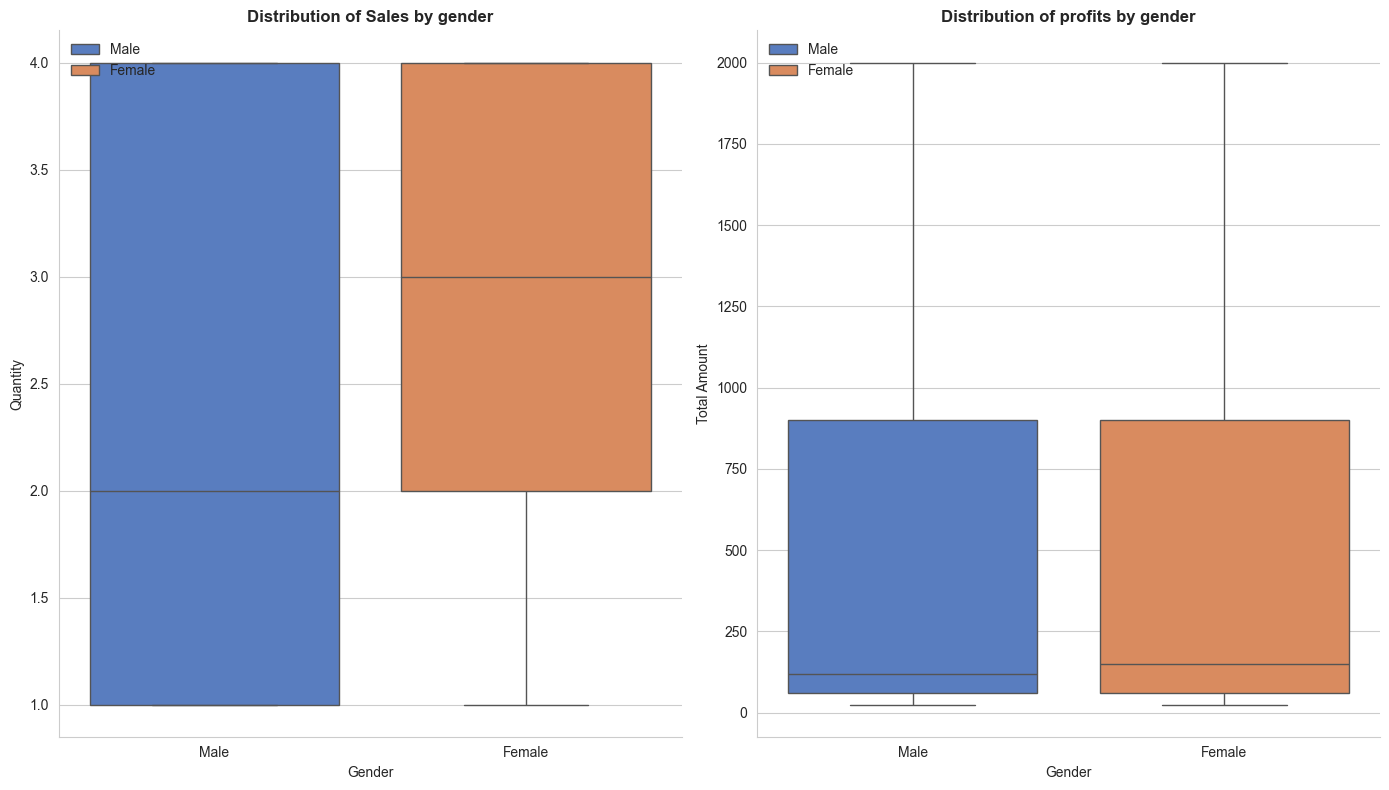

In [336]:

df_2023['Gender']=df_2023['Female'].apply(lambda x:  'Female' if x else 'Male')

fig, ax=plt.subplots(1,2,figsize=(14,8))
colors=sns.color_palette('muted', n_colors=2)
list_data=[
    {
        'y':'Quantity',
        'title':'Distribution of Sales by gender'
    },
    {
        'y':'Total Amount',
        'title':'Distribution of profits by gender'
    }
]
for index, box in enumerate(list_data):
    sns.boxplot(x='Gender', y=box['y'], data=df_2023, palette=colors, hue='Gender', ax=ax[index])
    setting_styles(ax[index], box['title'], ['Male', 'Female'])
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

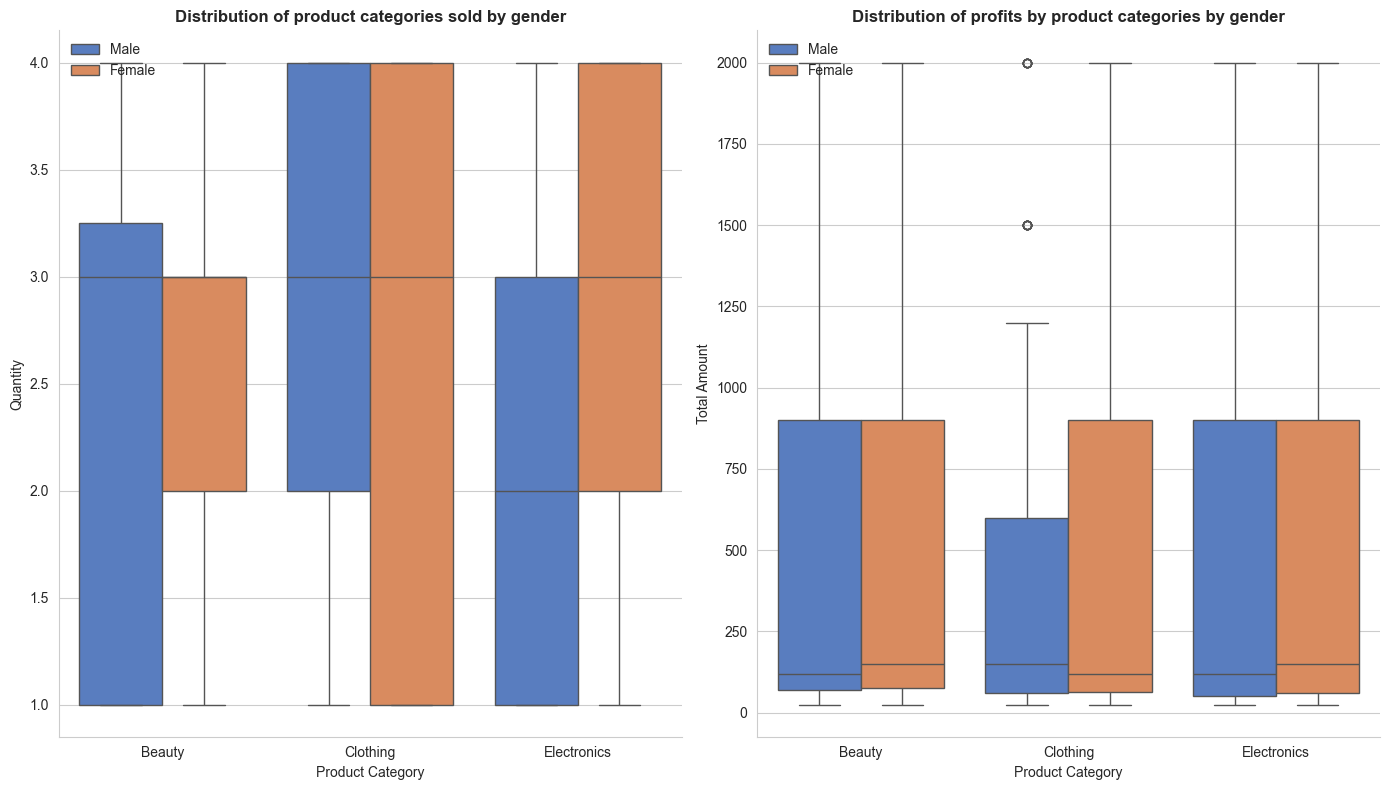

In [337]:
fig, ax=plt.subplots(1,2,figsize=(14,8))
list_data=[
    {
        'y':'Quantity',
        'title':'Distribution of product categories sold by gender'
    },
    {
        'y':'Total Amount',
        'title':'Distribution of profits by product categories by gender'
    }
]
for index, box in enumerate(list_data):
    sns.boxplot(x='Product Category', y=box['y'], data=df_2023, palette=colors, hue='Gender', ax=ax[index])
    setting_styles(ax[index], box['title'])
plt.tight_layout()
plt.show




In the *Beauty* category, male customers show greater variability in both the quantity of products purchased and the profits generated, suggesting less consistent buying behavior but potentially more profitable transactions. In *Clothing*, although both genders purchase similar quantities, female customers exhibit a wider range in their purchases and generate higher revenues, including some exceptionally high-value transactions. Finally, *Electronics* displays very similar purchasing behavior between men and women in terms of quantity and total amount spent, making it a stable and predictable category. These insights help identify key differences in consumer habits and support more targeted business strategies based on product category and customer gender.

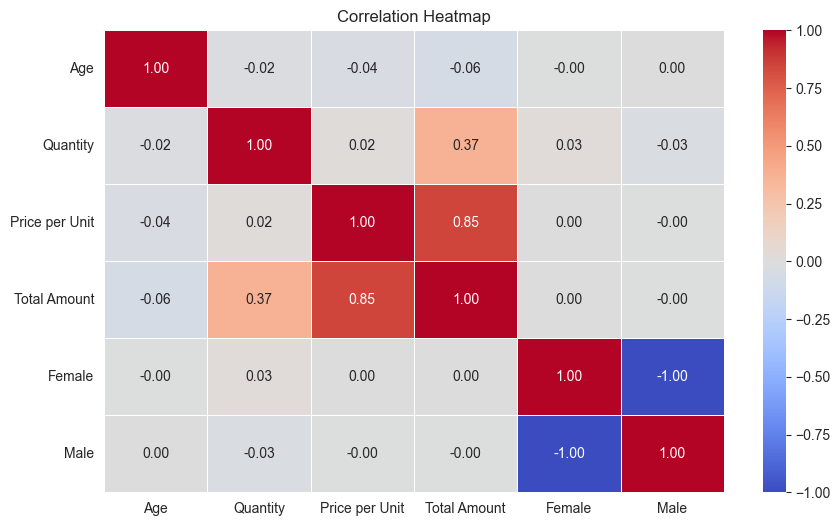

In [338]:
#add Heatmap
corr=df_2023.corr(numeric_only=True)
fig, ax=plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
ax.set_title('Correlation Heatmap')
plt.show()

The heatmap shows that the only strong correlation is between Total Amount and Price per Unit (0.85), which is expected because Total Amount is derived from multiplying Quantity and Price per Unit. Additionally, there is a moderate positive correlation (0.37) between Total Amount and Quantity, suggesting that higher quantities tend to lead to higher total spending. Other variables such as age and gender show negligible correlation with the rest of the dataset, indicating no strong linear relationships with spending behavior in this context.